In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import img_as_float
from skimage.util import random_noise
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Load image and convert to grayscale
f = cv.imread('/content/drive/My Drive/DIP-ESE558/Project3/input.jpeg')
# f = rgb2gray(f)
f = cv.cvtColor(f,cv.COLOR_RGB2GRAY)

In [15]:
# Convert image to double precision and scale values to range [0,1]
f = img_as_float(f)

# Add salt & pepper noise to the grayscale image
f = random_noise(f, mode='s&p', amount=0.1)

# Get image dimensions
M, N = f.shape

In [19]:
# 3x3 K-Nearest Neighbour filter
ktot = 4
P = 1
Q = 1
filter_size = ((2*P)+1) * ((2*Q)+1)
mean_filter = np.zeros(filter_size)
sorted_mean_filter_abs = np.zeros(filter_size)

for m in range(M):
    for n in range(N):
        r = 0
        for p in range(-P, P+1):
            if m-p < 0:
                k = abs(m-p)
            elif m-p >= M:
                k = M - (m-p-M+1)
            else:
                k = m-p
            for q in range(-Q, Q+1):
                if n-q < 0:
                    l = abs(n-q)
                elif n-q >= N:
                    l = N - (n-q-N+1)
                else:
                    l = n-q
                mean_filter[r] = f[k, l]
                r += 1

        centre_pixel = mean_filter[filter_size // 2]
        for a in range(filter_size):
            sorted_mean_filter_abs[a] = abs(mean_filter[a] - centre_pixel)
        sorted_mean_filter_abs = np.sort(sorted_mean_filter_abs)
        sum = 0
        for a in range(1, ktot+1):
            if mean_filter[a] - centre_pixel < 0:
                sum = sum - sorted_mean_filter_abs[a] + centre_pixel
            else:
                sum = sum + sorted_mean_filter_abs[a] + centre_pixel
        g[m, n] = sum / ktot

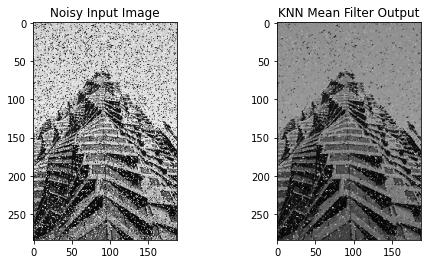

In [20]:
# Display input and output images
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(f, cmap=plt.cm.gray)
ax[0].set_title('Noisy Input Image')
ax[1].imshow(g, cmap=plt.cm.gray)
ax[1].set_title('KNN Mean Filter Output')
plt.show()